In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df = df.drop(columns = '_c39',axis=1)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [10]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [11]:
df['months_as_customer'].value_counts()

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64

In [12]:
df['age'].value_counts()

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

In [13]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [14]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [15]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [16]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [17]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [18]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [19]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

In [20]:
df['total_claim_amount'].value_counts()

59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64

In [21]:
df['injury_claim'].value_counts()

0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64

In [22]:
df['property_claim'].value_counts()

0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64

In [23]:
df['vehicle_claim'].value_counts()

5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64

In [24]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

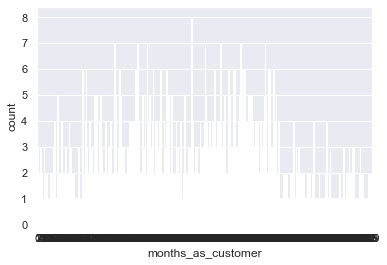

In [27]:
sns.set()
sns.countplot('months_as_customer',data=df);

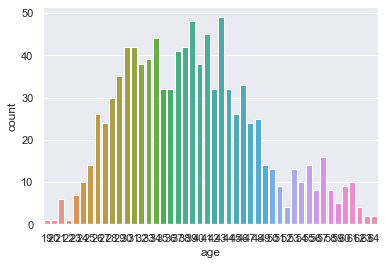

In [28]:
sns.countplot('age',data=df);

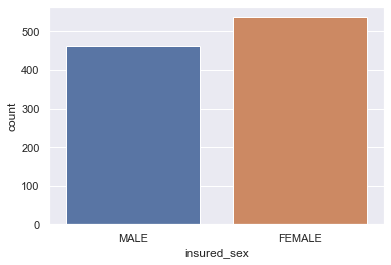

In [29]:
sns.countplot('insured_sex',data=df);

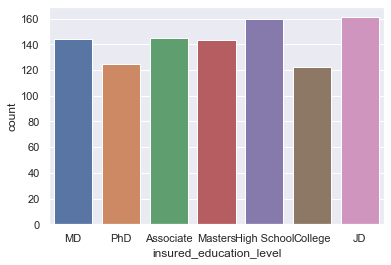

In [30]:
sns.countplot('insured_education_level',data=df);

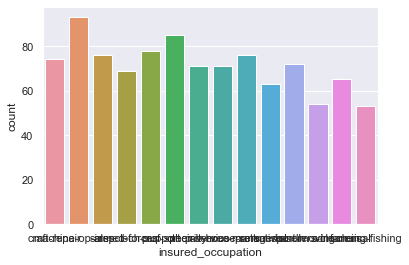

In [31]:
sns.countplot('insured_occupation',data=df);

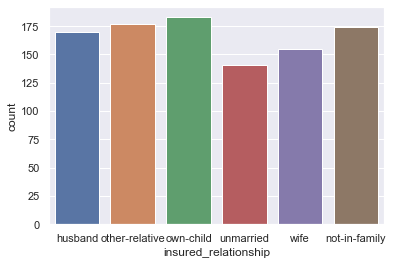

In [32]:
sns.countplot('insured_relationship',data=df);

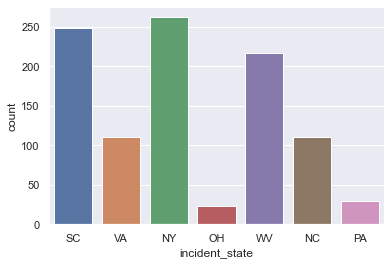

In [33]:
sns.countplot('incident_state',data=df);

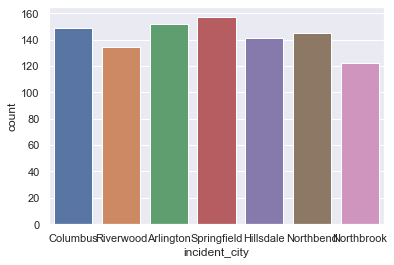

In [34]:
sns.countplot('incident_city',data=df);

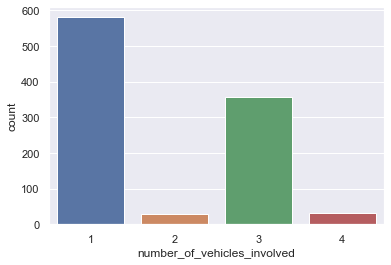

In [35]:
sns.countplot('number_of_vehicles_involved',data=df);

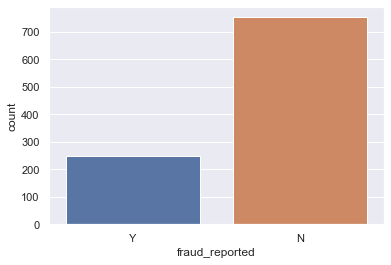

In [36]:
sns.countplot('fraud_reported',data=df);

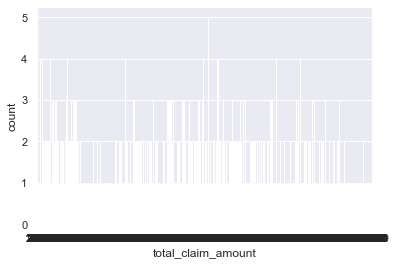

In [37]:
sns.countplot('total_claim_amount',data=df);

In [38]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


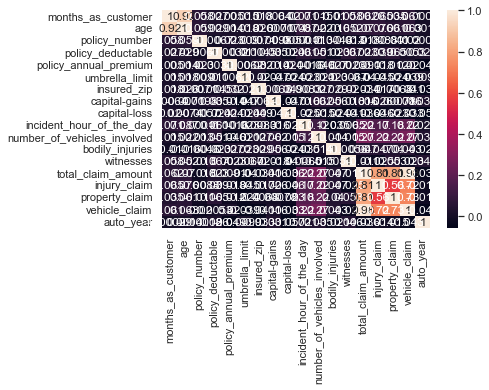

In [39]:
sns.heatmap(df.corr(), annot=True);

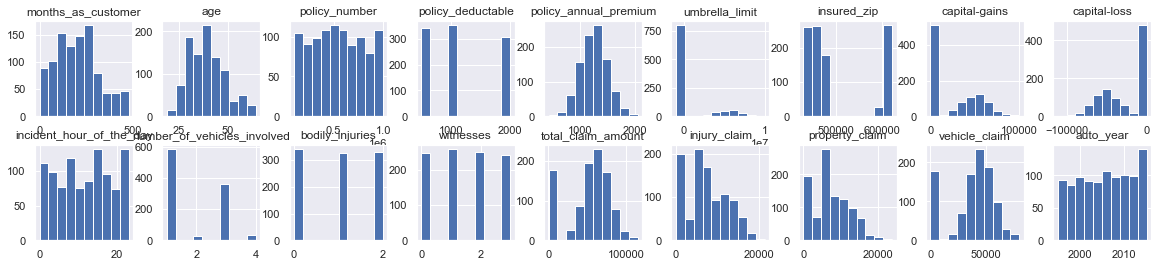

In [46]:
sns.set()
df.hist(figsize=(20,20), layout=(9,9), sharex=False);

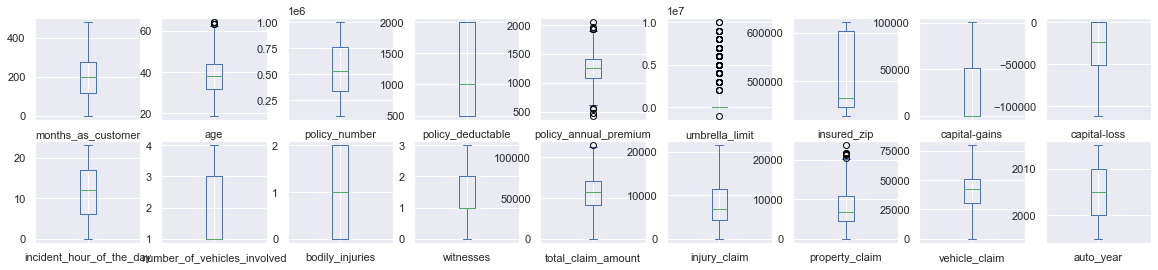

In [47]:
df.plot(kind='box', figsize=(20,20), layout=(9,9), sharex=False, subplots=True);

In [51]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [52]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,732,1,486,...,2,2,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,396,5,519,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,740,5,6,...,3,1,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,743,6,812,...,2,1,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,902,6,850,...,1,1,81,70,36,66,0,31,14,0
5,239,20,2,385,2,1,1,641,1,677,...,2,1,463,251,255,531,10,3,8,1
6,126,15,340,112,1,1,1,611,1,158,...,0,0,642,637,309,512,9,29,17,0
7,153,18,359,60,0,0,1,315,1,743,...,2,2,277,397,400,197,1,5,20,0
8,24,14,428,132,0,0,0,776,1,726,...,1,2,121,83,86,113,12,9,17,0
9,198,23,619,772,0,0,0,586,1,713,...,1,0,187,140,138,198,10,1,1,0


In [61]:
x = df1.drop(['fraud_reported'], axis=1)
y = df1['fraud_reported']

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=35)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)

print('accuracy on training data: {:,.2f}'.format(lr.score(x_train, y_train)))
print("Accuracy on test data: {:,.2f}".format(lr.score(x_test, y_test)))

accuracy on training data: 0.76
Accuracy on test data: 0.73


In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

model1 = rf.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

print('accuracy on training data: {:,.2f}'.format(rf.score(x_train, y_train)))
print("Accuracy on test data: {:,.2f}".format(rf.score(x_test, y_test)))

accuracy on training data: 1.00
Accuracy on test data: 0.79


In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

model2 = dt.fit(x_train, y_train)
prediction2 = model2.predict(x_test)

print('accuracy on training data: {:,.2f}'.format(dt.score(x_train, y_train)))
print("Accuracy on test data: {:,.2f}".format(dt.score(x_test, y_test)))

accuracy on training data: 1.00
Accuracy on test data: 0.78


In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [67]:
print(confusion_matrix(y_test,prediction1))

[[140   7]
 [ 36  17]]


In [68]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       147
           1       0.71      0.32      0.44        53

    accuracy                           0.79       200
   macro avg       0.75      0.64      0.65       200
weighted avg       0.77      0.79      0.75       200

